Combinatorial optimization - Finding optimal (for some metric) element of a finite set.

# Brute force methods

Sometimes there is no other way rather than to a brute force search. Typical problematic statements - different combinatorial problems.

## All subsets

$\huge \|2^A\|=2^{\|A\|}$

There is a function defined on a set. We need to find an optimal set within a limited domain. E.g. knapsack packing. Find a subset of elements with the biggest sum which fits into parameters.

In [6]:
def get_subsets(myset):
    for i in range(2 ** len(myset)):
        s = []
        cpi = i
        for j in range(len(myset)):
            if cpi % 2 == 1:
                s.append(myset[j])
            cpi >>= 1
        yield s
    
list(get_subsets('abc'))

[[], ['a'], ['b'], ['a', 'b'], ['c'], ['a', 'c'], ['b', 'c'], ['a', 'b', 'c']]

In [7]:
!pip install bitsets

In [17]:
from bitsets import bitset

def get_subsets2(myset):
    MySet = bitset('MySet', myset)
    return MySet.supremum.powerset()

list(get_subsets2((1, 2, 3, 4)))

[MySet(),
 MySet([1]),
 MySet([2]),
 MySet([3]),
 MySet([4]),
 MySet([1, 2]),
 MySet([1, 3]),
 MySet([1, 4]),
 MySet([2, 3]),
 MySet([2, 4]),
 MySet([3, 4]),
 MySet([1, 2, 3]),
 MySet([1, 2, 4]),
 MySet([1, 3, 4]),
 MySet([2, 3, 4]),
 MySet([1, 2, 3, 4])]

In [33]:
from itertools import combinations

def get_subsets3(myset):
    for i in range(len(myset) + 1):
        for c in combinations(myset, i):
            yield c
        
list(get_subsets3([1, 2, 3, 4]))

[(),
 (1,),
 (2,),
 (3,),
 (4,),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (1, 2, 3, 4)]

In [38]:
# depth first search

def get_items4(myset):
    if myset:
        for subs in get_items4(myset[1:]):
            yield subs
            yield subs + myset[:1]
    else:
        yield []
        
list(get_items4([1, 2, 3, 4]))

[[],
 [1],
 [2],
 [2, 1],
 [3],
 [3, 1],
 [3, 2],
 [3, 2, 1],
 [4],
 [4, 1],
 [4, 2],
 [4, 2, 1],
 [4, 3],
 [4, 3, 1],
 [4, 3, 2],
 [4, 3, 2, 1]]

## Permutations

$\|P(S)\| = \|S\|!$

[Heap's algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm)

In [47]:
from itertools import permutations

list(permutations('abc'))

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [58]:
# Heap's algorithm: 

def swap(A, i, j):
    k = A[i]
    A[i] = A[j]
    A[j] = k

def generate(A):
    c = [0] * len(A)
    yield list(A)
    i = 0
    while i < len(A):
        if  c[i] < i:
            if i % 2 == 0:
                swap(A, 0, i)
            else:
                swap(A, c[i], i)
                
            yield list(A)
            c[i] += 1
            i = 0
        else:
            c[i] = 0
            i += 1

list(generate([1, 2, 3]))

[[1, 2, 3], [2, 1, 3], [3, 1, 2], [1, 3, 2], [2, 3, 1], [3, 2, 1]]

### Let's apply to a problem of travelling salesman

Assume there is a flight from every airport to every. You want to travel through all Serbian towns in the shortest possible way. Print the route, display it as map.

Belgrade - Novi Sad 71.70635912259958


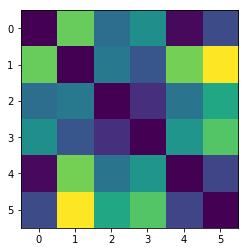

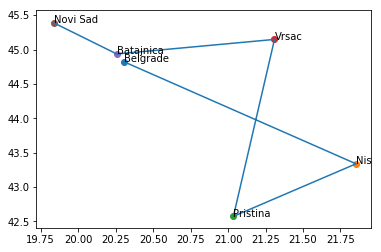

In [120]:
import requests, json, time, csv, math
import numpy as np
import matplotlib.pyplot as plt

def get_coordinates(place):
    GET = "https://geocode.xyz/{}?json=1" 
    time.sleep(1)
    json = requests.get(GET.format(place)).json()
    ## dirty hack
    if not 'latt' in json: return get_coordinates(place)
    
    y = json['longt']
    x = json['latt']
    return float(x), float(y)

def distance(p1, p2):
    R = 6373.0
    lat1, lat2 = math.radians(p1[0]), math.radians(p2[0])
    lon1, lon2 = math.radians(p1[0]), math.radians(p2[0])

    dlon = lon1 - lon2
    dlat = lat1 - lat2
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def get_airports(country):
    with open('data/airports.dat.csv', 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            city = row[2]
            country_ = row[3]
            lat = float(row[7])
            lon = float(row[6])
            if country == country_:
                yield city, (lat, lon)

A = dict((x, y) for x, y in get_airports('Serbia'))
airports = list(A.keys())
print("Belgrade - Novi Sad", distance(A['Belgrade'], A['Novi Sad']))

def build_dist_matrix(airports, A):
    M = np.zeros((len(airports), len(airports)))
    for a, b in product(range(M.shape[0]), range(M.shape[1])):
        M[a, b] = distance(A[airports[a]], A[airports[b]])
    return M

M = build_dist_matrix(airports, A)      
plt.imshow(M)
plt.show()
#################################################################

def get_shortest(M):
    
    # todo write your code here
    
    return [0, 1, 2, 3, 4, 5]

for txt in airports:
    plt.scatter(*A[txt])
    plt.annotate(txt, A[txt])

chain = np.matrix([A[airports[i]] for i in get_shortest(M)])    
plt.plot(chain[:, 0], chain[:, 1])
    
plt.show()

## All arrangements with repetitions

Order is important for passwords. Implement password generation for an alphabet in recursive form.

In [ ]:
def get_passwords(alphabet, len):
    # TODO write your code
    yield alphabet[:2]

assert set(get_passwords('abc', 2)) == {'aa', 'ab', 'ac', 'bc', 'ba', 'bb', 'ca', 'cb', 'cc'}

In [45]:
from itertools import product
list(product('abc', repeat=2))

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'c')]

## Grid search

Very often in numerical analysis we want to find an optimal value of a function, defined on multiple dimensions.

In [62]:
import numpy as np
from itertools import product


X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)

def f(x, y):
    return (x - 3) ** 2 + (y + 6) ** 2

def get_min(arrays, func):
    minimum, minargs = None, None
    for p in product(*arrays):
        v = func(*p)
        if minimum is None or minimum > v:
            minimum = v
            minargs = p
    return minargs, minimum

print(get_min([X, Y], f))

((2.929292929292929, -5.959595959595959), 0.00663197632894608)


In [68]:
# https://stackoverflow.com/questions/13370570/elegant-grid-search-in-python-numpy

from scipy.optimize import brute

def f2(x, *args):
    return f(*x)

brute(f2, [(-10, 10), (-10, 10)], Ns = 100)

array([ 3.00002824, -5.99996496])